# TESTE UTILS FOR EXEC 3 

> Felipe Andrade Garcia Tommaselli- 11800910

- Slide Aula 3: https://marofe.github.io/controle-digital/2024/aula3.html



In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import pprint, simplify
import lcapy as lc 
from lcapy.discretetime import n, z
from lcapy import UnitImpulse, UnitStep
import re 
from numpy import cos, sin

## Atividade 2

Nessa atividade, o objetivo é usar o recurso de cálculo simbólico do MATLAB para obter a transformada Z Inversa. Para isso, considere o seguinte exemplo:

$$ F(z) = \frac{z}{z - \frac{1}{3}} $$

A transformada Z inversa de $$ F(z) $$ pode ser obtida usando o MATLAB da seguinte forma: primeiramente defina a equação literal no MATLAB, para definir a variável $$ z $$, e outras variáveis que existirem na equação, utilize o comando `syms`. Em seguida, utilize o comando `iztrans`. Após encontrar a transformada Z inversa, pode-se visualizar o sinal no tempo discreto usando o comando `subs`.

```matlab
close all % Fecha todas as janelas
clear all % Limpa a memória
clc % Limpa a command window
%%
syms z % Define variáveis simbólicas
F = z/(z - 1/3); % Define eq da transf. Z
f = iztrans(F); % Obtém transf. Z inversa
pretty(f) % Exibe na tela de forma "bonita"
td = 1:10; % Cria vetor de tempo discreto
figure
stem(td, subs(f, 'n', td)) % Exibe sinal em tempo discreto
```

Seguindo a mesma lógica, encontre a transformada Z inversa dos seguintes sinais e mostre ao menos as 10 primeiras amostras usando `stem`.

1. $ F_a(z) = \frac{1}{z} $

2. $ F_b(z) = \frac{z + 2}{(z - \frac{1}{3})(z - \frac{1}{4})} $

3. $ F_c(z) = \frac{5z}{z - \frac{1}{2}} + \frac{2z}{(z - \frac{1}{9})^2} $

4. $ F_d(z) = \frac{5z(z - \cos(5))}{z^2 - 2 \cos(5)z + 1} $

5. $ F_e(z) = \frac{3z}{3z - 2} $


In [14]:
# Definindo os sinais
F_a = 1 / z
F_b = (z + 2) / ((z - 1/3) * (z - 1/4))
F_c = (5 * z) / (z - 1/2) + (2 * z) / (z - 1/9)**2
F_d = (5 * z * (z - lc.cos(5))) / (z**2 - 2 * lc.cos(5) * z + 1)
F_e = (3 * z) / (3 * z - 2)

# Calculando a transformada Z inversa para cada sinal
F_a = F_a(n, causal=True)
F_b = F_b(n, causal=True)
F_c = F_c(n, causal=True)
F_d = F_d(n, causal=True)
F_e = F_e(n, causal=True)

# Exibindo as transformadas Z inversas de forma "bonita"
F_a = simplify(F_a).evalf(1)
F_b = simplify(F_b).evalf(1)
F_c = simplify(F_c).evalf(1)
F_d = simplify(F_d).evalf(1)
F_e = simplify(F_e).evalf(1)


In [15]:
print('_.'*50)
print("Transformada Z de f_a[n]:\n")
pprint(F_a)

print('_.'*50)
print("\nTransformada Z de f_b[n]:\n")
#pprint(F_b)
print(F_b)

print('_.'*50)
print("\nTransformada Z de f_c[n]:\n")
#pprint(F_c)
print(F_c)

print('_.'*50)
print("\nTransformada Z de f_d[n]:\n")
pprint(F_d)
print('_.'*50)

print("\nTransformada Z de f_e[n]:\n")
pprint(F_e)
print('_.'*50)


_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.
Transformada Z de f_a[n]:

UnitImpulse(n - 1)
_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

Transformada Z de f_b[n]:

(-1.0e+2/4.0**n + 8.0e+1/3.0**n)*UnitStep(n) + 2.0e+1*UnitImpulse(n)
_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

Transformada Z de f_c[n]:

2.0*1.0e+1**(2.0e+1 - 2.0e+1*n)*1.0e+15**(n - 1.0)*n*UnitStep(n) + 5.0*UnitStep(n)/2.0**n
_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

Transformada Z de f_d[n]:

5.0⋅cos(5⋅n)⋅UnitStep(n)
_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

Transformada Z de f_e[n]:

   -n            
2.0  ⋅UnitStep(n)
_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.


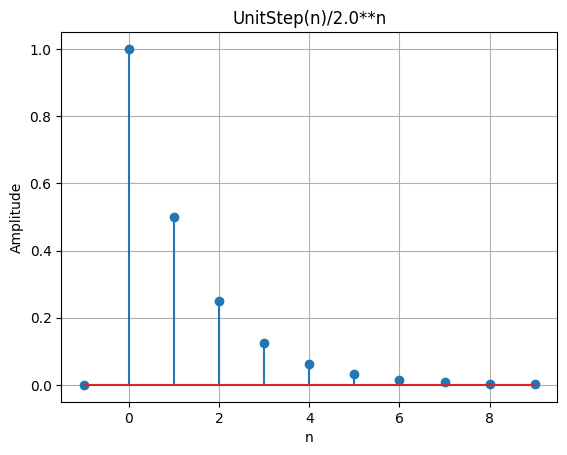

In [16]:
def ImpulseStepConvert(n_values, expr, LIM=10):
    """
    Converte uma expressão UnitImpulse do lcapy em um impulso unitário numérico e plota usando stem.

    Parameters:
    expr (Expr): Expressão UnitImpulse(n - k) do lcapy.
    """

    expr_str = str(expr)
    impulse = np.zeros(len(n_values))
    step = np.zeros(len(n_values))
    
    # Verifica se a string contém 'UnitImpulse'
    if 'UnitImpulse' in expr_str:
        # Extrai o deslocamento (shift) do impulso a partir da string
        shift_str = expr_str.split('UnitImpulse(')[1].split(')')[0].strip()
        
        try:
            # Converte o deslocamento para inteiro
            shift_str = shift_str.replace('n', '0')
            shift = int(eval(shift_str))
        except ValueError:
            print("Erro: Deslocamento não é um inteiro válido.")
            return
        

        impulse = np.zeros(len(n_values))
        
        # Coloca o impulso na posição correta com base no deslocamento
        if (shift + LIM) < len(impulse) and (shift + LIM) >= 0:
            impulse[shift + LIM] = 1
        
    if 'UnitStep' in expr_str:
        # Extrai o deslocamento (shift) do passo a partir da string
        shift_str = expr_str.split('UnitStep(')[1].split(')')[0].strip()
        
        try:
            # Converte o deslocamento para inteiro
            shift_str = shift_str.replace('n', '0')
            shift = int(eval(shift_str))
        except ValueError:
            print("Erro: Deslocamento não é um inteiro válido.")
            return np.zeros(len(n_values))
        
        # Cria o vetor da função de passo unitário
        step = np.zeros(len(n_values))
        
        # Preenche a função de passo com base no deslocamento
        step[n_values >= shift] = 1
    
    
    # Verifica se a expressão contém 'UnitImpulse' ou 'UnitStep'
    expr_str = re.sub(r'UnitImpulse\([^)]*\)', 'impulse', expr_str)
    expr_str = re.sub(r'UnitStep\([^)]*\)', 'step', expr_str)

    # replace n by 0 
    expr_str = expr_str.replace('n', 'n_values')


    # Cria um contexto para avaliação com base nas variáveis presentes na expressão
    context = {}
    context_test = {
        'impulse': impulse,
        'step': step,
        'cos': cos,
        'sin': sin,
        'n_values': n_values
    }
    # Adiciona variáveis ao contexto com base no dicionário
    for key, value in context_test.items():
        if key in expr_str:
            context[key] = value

    try:
        # Avalia a expressão
        signal = eval(expr_str, context)
    except Exception as e:
        print(f"Erro ao avaliar a expressão: {e}")
        raise e
        return None

    return signal


LIM = 10
# Define o intervalo de n para visualização
n_values = np.arange(-LIM, LIM)  # Ajuste conforme necessário


signal_in = F_e
#print('singal:', signal)
signal = ImpulseStepConvert(n_values, signal_in, LIM=LIM)  # Exemplo de uso
#print('signal:', signal)

# Plota usando stem
plt.stem(n_values[len(n_values)//2 - 1:], signal[len(signal)//2 - 1:])
plt.title(f'{str(signal_in)}')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [17]:
import sys
import os

# Adiciona o diretório pai ao caminho
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('utils.py'), '..')))

from Class3.utils import *


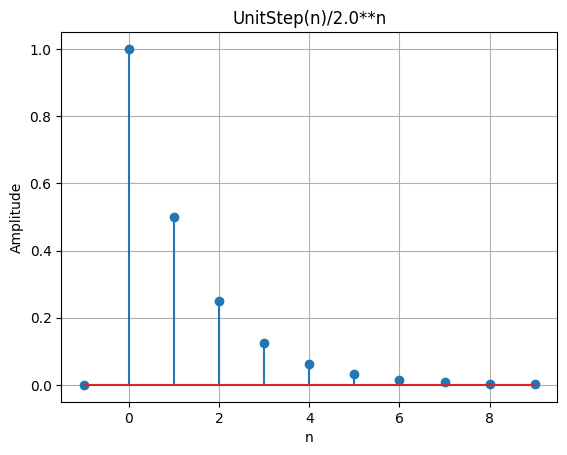

In [18]:

# Define o intervalox de n para visualização
LIM = 10
n_values = np.arange(-LIM, LIM)  # Ajuste conforme necessário


signal_in = F_e
#print('singal:', signal)
signal = PlotExpr(n_values, signal_in, LIM=LIM)  # Exemplo de uso
#print('signal:', signal)

# Plota usando stem
plt.stem(n_values[len(n_values)//2 - 1:], signal[len(signal)//2 - 1:])
plt.title(f'{str(signal_in)}')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()